In [1]:
import numpy
import ga

In [2]:
"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 4


In [5]:
# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)


[[ 0.73742087 -3.48955181 -2.16720559 -2.89907956  2.45509814  2.43636155]
 [-2.15847882 -0.26918014  2.02214284 -3.22260188  3.91087325  1.70521986]
 [-2.54525764 -2.22798078 -1.07776724 -2.01028728  2.85065383 -3.21330952]
 [-3.55862443  0.22791874  1.10215829  0.628657   -3.4463435  -3.02054438]
 [ 1.23865036  2.41093552  2.15858954 -2.87929374  1.32138085 -2.73403245]
 [-3.50046553  1.79473403  0.54383344  1.35307922 -2.5976214   1.11330286]
 [-3.6491879   1.10495468  3.37818663 -3.21084183  1.89765384  3.02508018]
 [ 1.60916994 -0.72537115 -1.77902877  3.4379296  -1.82087499 -0.97459007]]


In [6]:
best_outputs = []
num_generations = 1000
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = ga.mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

Generation :  0
Fitness
[-50.60880916 -68.16520359 -35.80332814  44.41684094  -8.3939117
  14.41879489 -56.12928595  43.46066753]
Best result :  44.41684094107345
Parents
[[-3.55862443  0.22791874  1.10215829  0.628657   -3.4463435  -3.02054438]
 [ 1.60916994 -0.72537115 -1.77902877  3.4379296  -1.82087499 -0.97459007]
 [-3.50046553  1.79473403  0.54383344  1.35307922 -2.5976214   1.11330286]
 [ 1.23865036  2.41093552  2.15858954 -2.87929374  1.32138085 -2.73403245]]
Crossover
[[-3.55862443  0.22791874  1.10215829  3.4379296  -1.82087499 -0.97459007]
 [ 1.60916994 -0.72537115 -1.77902877  1.35307922 -2.5976214   1.11330286]
 [-3.50046553  1.79473403  0.54383344 -2.87929374  1.32138085 -2.73403245]
 [ 1.23865036  2.41093552  2.15858954  0.628657   -3.4463435  -3.02054438]]
Mutation
[[-3.55862443  0.22791874  0.80156233  3.4379296  -1.82087499 -0.0955898 ]
 [ 1.60916994 -0.72537115 -1.64769047  1.35307922 -2.5976214   0.71577376]
 [-3.50046553  1.79473403  0.34137175 -2.87929374  1.32138

In [7]:
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

Best solution :  [[[   1.23865036    2.41093552  294.86100773    0.628657     -3.4463435
   -335.544588  ]]]
Best solution fitness :  [2650.25888455]


In [8]:
import matplotlib.pyplot

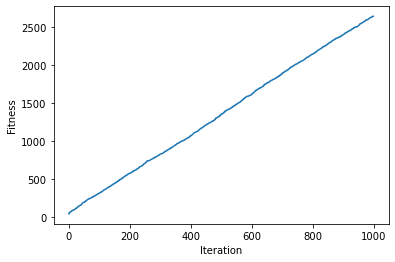

In [9]:
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()